<a href="https://colab.research.google.com/github/aflah02/PyTorch_ResNet/blob/main/PyTorch_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from torchvision import models
from torchvision import transforms
import torch

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [3]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [4]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
preprocess = transforms.Compose([
                                 transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean = [0.485, 0.456, 0.406],
                                     std = [0.229, 0.224, 0.225]
                                 )
])

In [11]:
from PIL import Image
import requests

In [15]:
img = Image.open(requests.get('https://freecontent.manning.com/wp-content/uploads/Stevens_PCCP2_03.png', stream = True).raw)

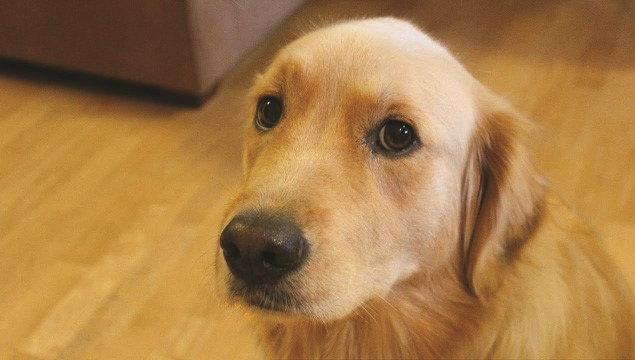

In [16]:
img

In [17]:
img_t = preprocess(img)

In [18]:
img_t

tensor([[[-0.7137, -0.7137, -0.6794,  ..., -0.0458, -0.0458, -0.0458],
         [-0.6794, -0.6965, -0.7308,  ...,  0.0056, -0.0116, -0.0458],
         [-0.6794, -0.7137, -0.7308,  ..., -0.0116, -0.0287, -0.0287],
         ...,
         [ 1.4269,  1.4440,  1.4269,  ...,  0.5193,  0.4679,  0.5022],
         [ 1.4612,  1.4098,  1.3927,  ...,  0.3994,  0.5878,  0.5536],
         [ 1.4269,  1.4269,  1.4440,  ...,  0.3994,  0.5536,  0.5707]],

        [[-1.1253, -1.1253, -1.1078,  ..., -0.6352, -0.6527, -0.6352],
         [-1.0903, -1.1078, -1.1429,  ..., -0.6001, -0.6001, -0.6176],
         [-1.0903, -1.1078, -1.1253,  ..., -0.6001, -0.6176, -0.6176],
         ...,
         [ 0.6078,  0.6604,  0.6604,  ..., -0.3550, -0.3901, -0.3550],
         [ 0.6604,  0.6429,  0.6429,  ..., -0.4251, -0.2850, -0.3025],
         [ 0.6954,  0.6779,  0.7129,  ..., -0.4076, -0.2675, -0.2150]],

        [[-1.2119, -1.2119, -1.1944,  ..., -0.9330, -0.9504, -0.9678],
         [-1.1944, -1.1944, -1.2119,  ..., -0

In [21]:
batch_t = torch.unsqueeze(img_t, 0)

In [22]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [23]:
out = resnet(batch_t)

In [24]:
out

tensor([[-3.5054e+00, -1.5468e+00, -2.4003e+00, -3.2392e+00, -3.5878e+00,
         -1.5540e+00, -1.9273e+00, -2.5055e+00, -1.2841e+00, -2.6775e+00,
         -1.6306e+00, -6.8499e-01, -1.9634e+00, -2.5761e+00, -2.2717e+00,
         -2.5942e+00, -2.9594e+00, -6.4331e-01, -3.1896e-01, -4.7952e-01,
         -2.6861e+00, -4.1456e+00, -2.0556e+00, -1.0734e+00, -9.0595e-01,
         -6.1377e-01, -3.0379e+00, -2.1753e+00, -1.9787e+00, -2.9236e+00,
         -3.0861e+00, -1.1698e+00, -1.5692e+00, -2.1741e+00, -2.2187e+00,
         -3.0561e+00, -1.2160e+00, -1.0188e+00, -1.4665e+00, -1.1666e+00,
         -4.4694e-01, -1.4681e+00,  1.3951e+00, -1.9594e-01, -1.9744e+00,
         -1.1461e+00,  9.1518e-01, -1.3865e+00, -2.9226e+00, -2.9417e+00,
         -2.5326e+00, -1.8479e+00, -1.5982e+00, -1.6242e+00, -1.6651e+00,
         -7.7435e-01, -1.3232e-01, -1.7267e+00, -2.9136e+00, -2.8926e-01,
          1.8643e-02, -5.9483e-01, -4.7247e-01, -1.0765e+00, -1.1576e+00,
         -1.8868e+00, -1.5188e+00, -4.

In [31]:
with open('imagenetclasses.txt') as f:
  labels = [line.strip() for line in f.readlines()]

In [32]:
labels

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [33]:
_, index = torch.max(out,1)

In [34]:
index

tensor([207])

In [35]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100

In [36]:
labels[index[0]], percentage[index[0]].item()

('golden retriever', 95.70716094970703)

In [37]:
_, indices = torch.sort(out, descending=True)

In [38]:
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 95.70716094970703),
 ('Labrador retriever', 3.2017018795013428),
 ('cocker spaniel, English cocker spaniel, cocker', 0.5982658267021179),
 ('redbone', 0.12366098910570145),
 ('tennis ball', 0.10625986754894257)]